In [2]:
from lexicalrichness import LexicalRichness
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('the_rest_data.zip')
df = df[df['Poll Responses Response'].notnull()]

In [4]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula'],
      dtype='object')

In [5]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)


## Data cleaning 

In [6]:
#clean This student was present, but did not complete the poll.
df = df[df['Poll Responses Response'] != 'This student was present, but did not complete the poll.']

#clean up extremely short sentences
df = df[df['string'].str.len() >= 10]

In [7]:
test = df['string'].head(3)

In [8]:
df[df['string'].str.len() <= 20]

,Polls ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,College,Course,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula
1144,99333,"beta, gamma and rate (nu)",#exactinference,1,3141,"['beta', 'gamma', 'and', 'rate', 'nu']","['beta', 'gamma', 'and', 'rate', 'nu']","['beta', 'gamma', 'rate', 'nu']",beta gamma rate nu,decisioninference,CS,CS112,75.88,3.7,1.6,0.0,-1.9,-1.46,15.68,1.0
3977,16158,c because they both have a real,#evaluatephylogenies,2,18,"['c', 'because', 'they', 'both', 'have', 'a', ...","['c', 'becaus', 'they', 'both', 'have', 'a', '...","['c', 'becaus', 'real']",c becaus real,evaluatephylogenies,NS,NS112,59.97,5.6,1.2,0.0,-2.7,-4.29,14.31,0.5
4018,48922,C is wrong because,#evaluatephylogenies,1,545,"['C', 'is', 'wrong', 'because']","['c', 'is', 'wrong', 'becaus']","['c', 'wrong', 'becaus']",c wrong becaus,evaluatephylogenies,NS,NS112,93.81,0.9,1.2,0.0,-1.2,-2.38,14.31,0.5
4023,48922,A - pine stemmed from Fern,#evaluatephylogenies,2,545,"['A', 'pine', 'stemmed', 'from', 'Fern']","['a', 'pine', 'stem', 'from', 'fern']","['pine', 'stem', 'fern']",pine stem fern,evaluatephylogenies,NS,NS112,119.19,-2.7,1.2,0.0,-1.2,-2.38,9.05,0.5
4141,265602,Red Kangaro because they,#evaluatephylogenies,3,12308,"['Red', 'Kangaro', 'because', 'they']","['red', 'kangaro', 'becaus', 'they']","['red', 'kangaro', 'becaus']",red kangaro becaus,evaluatephylogenies,NS,NS112,59.97,5.6,1.2,0.0,5.2,5.35,14.31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179123,293739,"(,) --> (,)\n(,) --> (,)\n\nmap: T(,)\n\nTo ca...",#Transformations,2,13709,"['map', 'T', 'To', 'calculate', 'T', 'T']","['map', 't', 'to', 'calcul', 't', 't']","['map', 'calcul']",map calcul,transformationapplication,CS,CS111B,77.91,2.9,0.8,0.0,0.8,-4.51,11.63,0.0
179209,297683,I sincerely do not know.,#Transformations,1,14012,"['I', 'sincerely', 'do', 'not', 'know']","['i', 'sincer', 'do', 'not', 'know']","['sincer', 'know']",sincer know,transformationapplication,CS,CS111B,77.91,2.9,0.8,0.0,3.1,-1.61,11.63,0.0
179241,303417,"RREF of {(, , ), (, , ), (, -, )} {, , }\nR = ...",#Transformations,3,14344,"['RREF', 'of', 'R', 'R', 'R']","['rref', 'of', 'r', 'r', 'r']","['rref', 'r', 'r', 'r']",rref r r r,transformationapplication,CS,CS111B,118.18,-2.3,1.6,0.0,-11.3,-13.06,11.73,1.0
179375,305210,"s = [,,],[,,],[,,]\n[,,] = a[,,]+b[,,]+c[-,,]\...",#Transformations,3,14435,"['s', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'g', ...","['s', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'g', ...","['b', 'c', 'e', 'f', 'g', 'g', 'v']",b c e f g g v,transformationapplication,CS,CS111B,115.13,-1.2,2.8,0.0,-13.3,-14.15,17.52,2.5


In [9]:
#not yet put in lex.Dugast, lex.msttr(segment_window=0), lex.mattr(window_size=0),lex.hdd(draws=0),
def generate_words(text):
    lex = LexicalRichness(text)
    return lex.words
df['words_count'] = df['string'].apply(generate_words)

In [10]:
df = df[df['words_count'] > 1]

In [11]:
df['lex_data_prep']= df['stemmed_responses'].str.split(',').replace("'", '').str.join(' ')

df['lex_data_prep'] = df['stemmed_responses'].apply(" ".join)

In [34]:
df['lex_data_prep'] = df['stemmed_responses'].str.strip('[').str.strip(']').str.split(',').str.join(' ').str.replace("'", '')
df['lex_data_prep'].head()

0    the  strength  of  plato  approach  is  his  c...
1    in  the  breakout  we  discuss  if  outsid  th...
2    back  to  cmmon  confus  time  the  section  u...
3    most  difficult  weak  is  that  his  posit  w...
4    "im"  still  tri  to  understand  the  signifi...
Name: lex_data_prep, dtype: object

In [ ]:
df.h

In [35]:
#not yet put in lex.Dugast, lex.msttr(segment_window=0), lex.mattr(window_size=0),lex.hdd(draws=0),lex.Summer (math domain error)
def generate_lexcial_richness(text):
    lex = LexicalRichness(text)
    try:
        return lex.Dugast
    except:
        return False

df['Dugast'] = df['lex_data_prep'].apply(generate_lexcial_richness)
df.head()
df[df['Dugast'] == False]

,Polls ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,...,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,words_count,lex_data_prep,Dugast
225,108779,Threat for two reasons ) explanatory power.,#objmorality,4,4028,"['Threat', 'for', 'two', 'reasons', 'explanato...","['threat', 'for', 'two', 'reason', 'explanator...","['threat', 'two', 'reason', 'explanatori', 'po...",threat two reason explanatori power,objmorality,...,7.6,10.00,0.0,10.3,14.24,10.20,2.5,5,threat for two reason explanatori power,False
1026,92219,Multiply by exp and then I'd integrate over th...,#exactinference,2,2207,"['Multiply', 'by', 'exp', 'and', 'then', ""I'd""...","['multipli', 'by', 'exp', 'and', 'then', ""i'd""...","['multipli', 'exp', ""i'd"", 'integr', 'theta', ...",multipli exp i'd integr theta margin,decisioninference,...,8.0,15.73,0.0,5.9,8.17,17.09,4.0,7,"multipli by exp and then ""id"" integr ov...",False
1027,92219,"In general, I would treat θ as a nuisance para...",#exactinference,2,2207,"['In', 'general', 'I', 'would', 'treat', 'θ', ...","['in', 'general', 'i', 'would', 'treat', 'θ', ...","['general', 'treat', 'θ', 'nuisanc', 'paramet'...",general treat θ nuisanc paramet sum integr,decisioninference,...,9.6,8.51,0.0,6.3,9.87,13.01,4.5,7,in general i would treat θ as a nuisan...,False
1144,99333,"beta, gamma and rate (nu)",#exactinference,1,3141,"['beta', 'gamma', 'and', 'rate', 'nu']","['beta', 'gamma', 'and', 'rate', 'nu']","['beta', 'gamma', 'rate', 'nu']",beta gamma rate nu,decisioninference,...,3.7,1.60,0.0,-1.9,-1.46,15.68,1.0,4,beta gamma and rate nu,False
1149,99335,I'm still confused about the last activity.,#exactinference,1,3142,"[""I'm"", 'still', 'confused', 'about', 'the', '...","[""i'm"", 'still', 'confus', 'about', 'the', 'la...","[""i'm"", 'still', 'confus', 'last', 'activ']",i'm still confus last activ,decisioninference,...,2.9,2.00,0.0,2.7,3.80,10.20,1.5,6,"""im"" still confus about the last activ",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179327,305203,The second one hold when we draw ou,#Transformations,1,14433,"['The', 'second', 'one', 'hold', 'when', 'we',...","['the', 'second', 'one', 'hold', 'when', 'we',...","['second', 'one', 'hold', 'draw', 'ou']",second one hold draw ou,transformationapplication,...,0.5,2.00,0.0,-1.1,0.32,7.04,1.5,5,the second one hold when we draw ou,False
179390,310232,It means that the rows must form a set of orth...,#Transformations,2,14630,"['It', 'means', 'that', 'the', 'rows', 'must',...","['it', 'mean', 'that', 'the', 'row', 'must', '...","['mean', 'row', 'must', 'form', 'set', 'orthon...",mean row must form set orthonorm vector,transformationapplication,...,2.5,2.80,0.0,4.3,7.37,8.50,2.5,7,it mean that the row must form a set ...,False
179470,318026,"No.\nExample:\nA = \n[,]\n[,]\nis not invertib...",#Transformations,2,15107,"['No', 'Example', 'A', 'is', 'not', 'invertibl...","['no', 'exampl', 'a', 'is', 'not', 'invert', '...","['exampl', 'invert', 'still', 'diagonaliz', 'm...",exampl invert still diagonaliz matrix two eige...,transformationapplication,...,14.3,14.23,0.0,12.4,17.35,15.26,4.5,7,no exampl a is not invert but still di...,False
179720,318626,see picture :( didn't know this one was for pa...,#PhaseTransitions,4,15125,"['see', 'picture', ""didn't"", 'know', 'this', '...","['see', 'pictur', ""didn't"", 'know', 'this', 'o...","['see', 'pictur', 'know', 'one', 'past']",see pictur know one past,phasetransitions,...,0.5,2.00,0.0,-0.2,1.48,7.04,1.5,5,"see pictur ""didnt"" know this one was fo...",False


In [38]:
len(df[df['Dugast'] == False])

839

In [48]:
#not yet put in lex.Dugast, lex.msttr(segment_window=0), lex.mattr(window_size=0),lex.hdd(draws=0),lex.Summer (math domain error)
def generate_lexcial_richness(text):
    lex = LexicalRichness(text)
    try:
        return lex.msttr(segment_window = 20)
    except:
        return False

df['msttr'] = df['lex_data_prep'].apply(generate_lexcial_richness)
df.head()

,Polls ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,...,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,words_count,lex_data_prep,Dugast,msttr
0,12522,The strengths of Plato's approach is his const...,#objectivemorality,2,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...,objmorality,...,9.60,0.0,19.2,18.28,14.04,12.0,24,the strength of plato approach is his c...,90.603405,0.925
1,12522,In the breakout we discussed if outside the ca...,#objectivemorality,3,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'big...",breakout discuss outsid cave bigger cave thus ...,objmorality,...,11.60,0.0,15.0,12.48,13.09,13.5,25,in the breakout we discuss if outsid th...,56.677811,0.825
2,12522,Back to cmmon confusion time: the section 'und...,#objectivemorality,2,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...,objmorality,...,11.27,0.0,18.6,17.58,13.38,14.0,24,back to cmmon confus time the section u...,47.879322,0.85
3,12522,Most difficult weakness is that his position w...,#objectivemorality,2,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...,objmorality,...,11.51,0.0,13.4,14.85,12.84,11.5,17,most difficult weak is that his posit w...,80.343345,0.85
4,12522,I'm still trying to understand the significanc...,#objectivemorality,2,1,"[""I'm"", 'still', 'trying', 'to', 'understand',...","[""i'm"", 'still', 'tri', 'to', 'understand', 't...","[""i'm"", 'still', 'tri', 'understand', 'signifi...",i'm still tri understand signific cave analog ...,objmorality,...,10.30,0.0,13.5,12.53,10.69,12.5,22,"""im"" still tri to understand the signifi...",87.158819,0.95


In [57]:
len(df[df['msttr'] == False])/len(df)

0.013901573942813598

(array([2.4810e+03, 1.8000e+01, 7.6000e+01, 5.4000e+01, 1.9800e+02,
        8.4300e+02, 1.7750e+03, 6.4620e+03, 7.3612e+04, 9.2950e+04]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

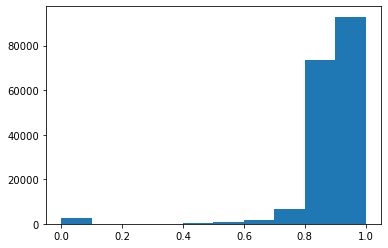

In [53]:
import matplotlib.pyplot as plt
plt.hist(df['msttr'])

(array([4.5000e+01, 1.2500e+02, 4.2500e+02, 8.6800e+02, 1.9980e+03,
        5.8840e+03, 2.1039e+04, 5.4394e+04, 6.7989e+04, 2.5702e+04]),
 array([0.0483871 , 0.14354839, 0.23870968, 0.33387097, 0.42903226,
        0.52419355, 0.61935484, 0.71451613, 0.80967742, 0.90483871,
        1.        ]),
 <BarContainer object of 10 artists>)

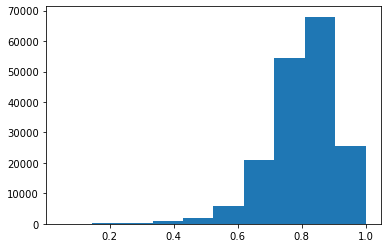

In [56]:
plt.hist(df['ttr'])

In [55]:
#not yet put in lex.Dugast, lex.msttr(segment_window=0), lex.mattr(window_size=0),lex.hdd(draws=0),lex.Summer (math domain error)
def generate_lexcial_richness(text):
    lex = LexicalRichness(text)
    return lex.terms, lex.ttr, lex.rttr, lex.cttr, lex.mtld(threshold=0.72),  lex.Herdan,  lex.Maas

df['unique_words'], df['ttr'], df['rttr'], df['cttr'], df['mtld'], df['herdan'], df['maas']= zip(*df['string'].apply(generate_lexcial_richness))
df.head()

,Polls ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,...,lex_data_prep,Dugast,msttr,unique_words,ttr,rttr,cttr,mtld,herdan,maas
0,12522,The strengths of Plato's approach is his const...,#objectivemorality,2,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...,objmorality,...,the strength of plato approach is his c...,90.603405,0.925,23,0.958333,4.694855,3.319764,161.280,0.986608,0.004214
1,12522,In the breakout we discussed if outside the ca...,#objectivemorality,3,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'big...",breakout discuss outsid cave bigger cave thus ...,objmorality,...,in the breakout we discuss if outsid th...,56.677811,0.825,23,0.920000,4.600000,3.252691,87.500,0.974096,0.008048
2,12522,Back to cmmon confusion time: the section 'und...,#objectivemorality,2,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...,objmorality,...,back to cmmon confus time the section u...,47.879322,0.85,19,0.791667,3.878359,2.742414,28.128,0.926491,0.023130
3,12522,Most difficult weakness is that his position w...,#objectivemorality,2,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...,objmorality,...,most difficult weak is that his posit w...,80.343345,0.85,17,1.000000,4.123106,2.915476,17.000,1.000000,0.000000
4,12522,I'm still trying to understand the significanc...,#objectivemorality,2,1,"[""I'm"", 'still', 'trying', 'to', 'understand',...","[""i'm"", 'still', 'tri', 'to', 'understand', 't...","[""i'm"", 'still', 'tri', 'understand', 'signifi...",i'm still tri understand signific cave analog ...,objmorality,...,"""im"" still tri to understand the signifi...",87.158819,0.95,22,1.000000,4.690416,3.316625,22.000,1.000000,0.000000


In [1]:
text = """Measure of textual lexical diversity, computed as the mean length of sequential words in
                a text that maintains a minimum threshold TTR score.

                Iterates over words until TTR scores falls below a threshold, then increase factor
                counter by 1 and start over. McCarthy and Jarvis (2010, pg. 385) recommends a factor
                threshold in the range of [0.660, 0.750].
                (McCarthy 2005, McCarthy and Jarvis 2010)"""

# instantiate new text object (use the tokenizer=blobber argument to use the textblob tokenizer)
lex = LexicalRichness(text)

# Return word count.
lex.words

NameError: name 'LexicalRichness' is not defined

In [3]:
# Return (unique) word count.
lex.terms

39